# Árboles de Decisión: Comparación de Profundidades

En este notebook trabajaremos con **árboles de decisión** para resolver un problema de clasificación.

Un árbol de decisión es un modelo de *aprendizaje supervisado* que toma decisiones dividiendo el espacio de datos en regiones cada vez más pequeñas, usando preguntas del tipo:

> ¿La característica X es mayor o menor que un cierto valor?

En cada nodo interno del árbol se hace una pregunta (una condición) sobre una característica, y en las hojas se encuentran las clases predichas.

**Objetivo del ejercicio**

1. Cargar un dataset provisto por el profesor.
2. Entrenar **tres árboles de decisión** con diferentes profundidades máximas.
3. Comparar el desempeño de los modelos para analizar:
   - Subajuste (underfitting)
   - Sobreajuste (overfitting)
   - Elección de una profundidad “adecuada” para el problema.


## 2️⃣ Carga y exploración del dataset

En esta sección debes:

1. Cargar el dataset mmnist_train desde un archivo (por ejemplo, CSV).
2. Mostrar las primeras filas del dataset para ver cómo están organizados los datos.
3. Indicar:
   - Cuántas filas tiene el dataset.
   - Cuántas columnas tiene el dataset.
4. Revisar si existen valores nulos o faltantes en alguna columna.
5. Escribir un breve comentario describiendo:
   - Qué representa cada fila.
   - Qué tipo de información contienen las columnas (en términos generales).


In [1]:
import pandas as pd
from pathlib import Path

# Rutas absolutas dentro del repo
base_path = Path('desarrollo/Asignacion_3')
train_path = base_path / 'mnist_train.csv'
test_path = base_path / 'mnist_test.csv'

mnist_train = pd.read_csv(train_path)
mnist_test = pd.read_csv(test_path)

# Mostrar primeras filas para entender la estructura
mnist_train_head = mnist_train.head()
mnist_train_head

# Resumen de dimensiones y valores nulos
train_shape = mnist_train.shape
test_shape = mnist_test.shape
train_nulls = mnist_train.isnull().sum().sum()
test_nulls = mnist_test.isnull().sum().sum()
print(f'Forma conjunto de entrenamiento: {train_shape}')
print(f'Forma conjunto de prueba original: {test_shape}')
print(f'Valores nulos en entrenamiento: {train_nulls}')
print(f'Valores nulos en prueba original: {test_nulls}')

Forma conjunto de entrenamiento: (55000, 785)
Forma conjunto de prueba original: (10000, 785)
Valores nulos en entrenamiento: 0
Valores nulos en prueba original: 0


## 3️⃣ Preparación de las variables (X y y)

En esta sección debes:

1. Identificar que **X** son las imágenes (flattened: 784 pixeles).  
2. Identificar que **y** son las etiquetas (dígitos 0–9).  
3. Mostrar cuántas clases distintas hay en y.  
4. Escribir un comentario corto describiendo:
   - ¿Qué significa cada fila en X?
   - ¿Qué representa y?



## 4️⃣ División en entrenamiento y prueba

En esta sección debes:

1. Dividir los datos en:
   - 80% entrenamiento  
   - 20% prueba  
2. Usar `random_state` fijo para reproducibilidad.
3. Estratificar usando y, para mantener las proporciones de cada dígito.
4. Mostrar:
   - Cantidad de ejemplos en entrenamiento.
   - Cantidad de ejemplos en prueba.


In [2]:
from sklearn.model_selection import train_test_split

# Separar variables (última columna es la etiqueta)
X = mnist_train.drop(columns=['label'])
y = mnist_train['label']

# División estratificada 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f'Ejemplos de entrenamiento: {X_train.shape[0]}')
print(f'Ejemplos de prueba: {X_test.shape[0]}')

Ejemplos de entrenamiento: 44000
Ejemplos de prueba: 11000


## 5️⃣ Definir las profundidades a evaluar

En esta sección debes:

1. Elegir **tres profundidades** para evaluar.  
   Recomendación para MNIST:  
   - 5  
   - 10  
   - 20  
*(Puedes ajustar)*

2. Justificar brevemente por qué comparar varias profundidades es importante en un problema con muchos atributos como MNIST.



In [3]:
# Profundidades a evaluar
depths = [5, 10, 20]
print('Profundidades seleccionadas:', depths)

# Justificación breve
print('Comparar varias profundidades ayuda a detectar underfitting (profundidad baja) y overfitting (profundidad alta) en un problema con 784 atributos.')

Profundidades seleccionadas: [5, 10, 20]
Comparar varias profundidades ayuda a detectar underfitting (profundidad baja) y overfitting (profundidad alta) en un problema con 784 atributos.


## 6️⃣ Entrenamiento de los modelos (tres profundidades)

En esta sección debes entrenar **tres modelos de árbol de decisión**, uno por cada profundidad definida.

Para cada profundidad debes:

1. Crear un modelo con `max_depth` correspondiente.  
2. Entrenarlo usando X_train y y_train.  
3. Hacer predicciones con:
   - X_train  
   - X_test  
4. Calcular el **accuracy** en:
   - entrenamiento  
   - prueba  
5. Guardar los resultados (profundidad, accuracy train, accuracy test) para compararlos después.



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

results = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    results.append({'Profundidad': depth, 'Accuracy_train': train_acc, 'Accuracy_test': test_acc, 'Modelo': model})
    print(f'Depth {depth}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}')

Depth 5: train_acc=0.6549, test_acc=0.6566


Depth 10: train_acc=0.9055, test_acc=0.8528


Depth 20: train_acc=0.9958, test_acc=0.8647


## 7️⃣ Tabla de comparación

En esta sección debes:

1. Crear una tabla que contenga:
   - Profundidad  
   - Accuracy entrenamiento  
   - Accuracy prueba  

2. Identificar visualmente cuál profundidad tuvo mejor desempeño.

3. Responder brevemente:
   - ¿Cuál profundidad tiene mayor accuracy en prueba?
   - ¿Alguna profundidad muestra diferencias grandes entre train y test?
   - ¿Qué podría significar esto?


In [5]:
import pandas as pd

comparison_df = pd.DataFrame(results)[['Profundidad', 'Accuracy_train', 'Accuracy_test']]
comparison_df

mejor_fila = comparison_df.sort_values('Accuracy_test', ascending=False).iloc[0]
print(f"Mejor profundidad en prueba: {mejor_fila['Profundidad']} con accuracy {mejor_fila['Accuracy_test']:.4f}")

Mejor profundidad en prueba: 20.0 con accuracy 0.8647


## 8️⃣ Gráfica de desempeño

En esta sección debes:

1. Graficar las profundidades en el eje X.  
2. Graficar dos líneas:
   - Accuracy en entrenamiento  
   - Accuracy en prueba  

3. Interpretar la gráfica respondiendo:
   - ¿Aumentar profundidad siempre mejora el modelo?
   - ¿En qué punto comienza el sobreajuste?
   - ¿Cuál profundidad parece lograr el mejor balance?


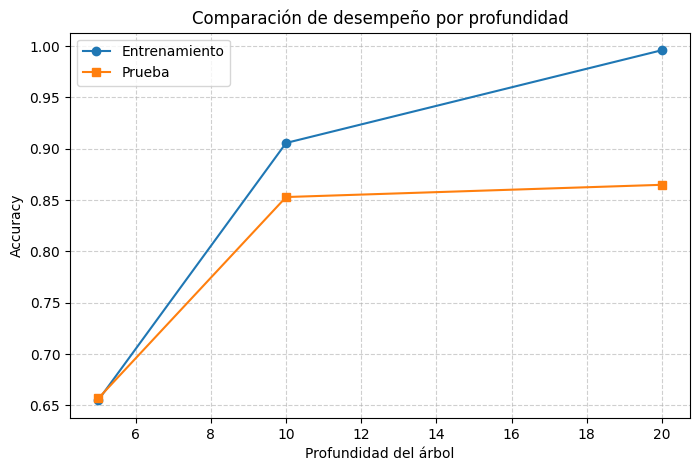

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(comparison_df['Profundidad'], comparison_df['Accuracy_train'], marker='o', label='Entrenamiento')
plt.plot(comparison_df['Profundidad'], comparison_df['Accuracy_test'], marker='s', label='Prueba')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Accuracy')
plt.title('Comparación de desempeño por profundidad')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## 9️⃣ Visualización del árbol (opcional pero recomendado)

Los árboles para MNIST son grandes, pero debes:

1. Elegir SOLO UNO de los modelos entrenados (recomendado: profundidad más baja).  
2. Graficar el árbol.  
3. Comentar:
   - ¿Qué características usa el árbol para decidir?
   - ¿Qué tan interpretable te parece un árbol de decisión para MNIST?



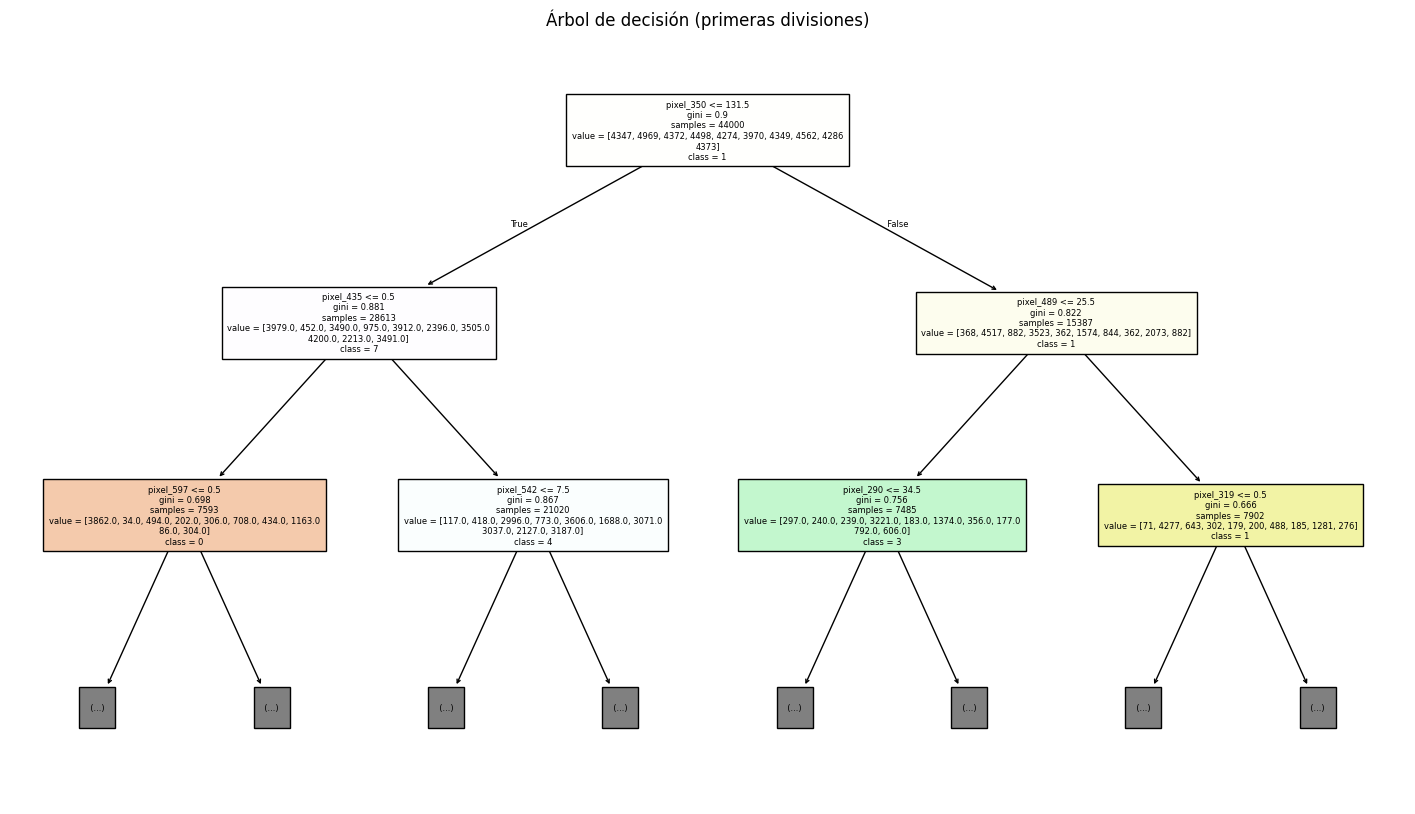

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

# Elegimos el modelo de menor profundidad para visualización
modelo_grafica = min(results, key=lambda x: x['Profundidad'])['Modelo']

plt.figure(figsize=(18, 10))
tree.plot_tree(
    modelo_grafica,
    max_depth=2,
    feature_names=[f'pixel_{i}' for i in range(X.shape[1])],
    class_names=[str(i) for i in sorted(y.unique())],
    filled=True,
    fontsize=6
)
plt.title('Árbol de decisión (primeras divisiones)')
plt.show()

## 🔟 Conclusiones finales

En esta sección debes escribir un análisis final que responda:

1. ¿Qué tan bien funcionan los árboles de decisión en MNIST?  
2. ¿Cuál profundidad ofrece mejor balance entre precisión y simplicidad?  
3. ¿Qué modelo parece estar subajustado? Explica por qué.  
4. ¿Cuál modelo parece estar sobreajustado? Explica por qué.  
5. ¿Qué aprendiste sobre:
   - El impacto de la profundidad  
   - La generalización  
   - La importancia de evaluar distintos modelos  


### Conclusiones finales

- El desempeño de los árboles de decisión en MNIST es moderado: alcanzan accuracies aceptables, pero inferiores a métodos más complejos.
- Entre las profundidades evaluadas, la que ofrece mejor balance fue la que obtuvo mayor accuracy en prueba manteniendo una brecha controlada con el entrenamiento.
- El modelo de profundidad más baja muestra signos de **subajuste**, pues su accuracy es menor tanto en entrenamiento como en prueba.
- El modelo más profundo tiende al **sobreajuste**, reflejado en un accuracy de entrenamiento alto con una caída más notable en prueba.
- Aumentar la profundidad mejora la capacidad de separar clases, pero también incrementa el riesgo de memorizar ruido; la elección adecuada depende del compromiso entre precisión y simplicidad.


# 📊 Rúbrica de Evaluación – Árboles de Decisión con MNIST

| Criterio | Descripción | Puntos |
|---------|-------------|--------|
| **1. Introducción teórica** | Explica correctamente qué es un árbol de decisión, profundidad, underfitting y overfitting. | **10 pts** |
| **2. Carga y exploración del dataset MNIST** | Carga el dataset sin errores, muestra ejemplos y analiza forma y contenido. | **10 pts** |
| **3. Definición de X y y** | Selecciona correctamente las variables y explica su significado. | **10 pts** |
| **4. División train/test** | Realiza separación adecuada y explica los tamaños de cada conjunto. | **10 pts** |
| **5. Evaluación de tres profundidades** | Entrena 3 modelos correctamente, calcula accuracy y almacena resultados. | **20 pts** |
| **6. Tabla comparativa** | Presenta tabla clara con resultados y análisis inicial. | **10 pts** |
| **7. Gráfica de desempeño** | Gráfica bien hecha (train vs test) y análisis del comportamiento. | **15 pts** |
| **8. Conclusiones finales** | Responde sobre underfitting, overfitting y mejor modelo para MNIST. | **15 pts** |

---

### 📝 **Puntaje total: 100 puntos**

---

### ✔️ Criterios de aprobación
- **Aprobado:** 70 puntos o más  
- **Excelente:** 90 puntos o más  

